# Function to automatic merge and fill missing values



## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them), add new columns (flag, MONTH and DAY), and OPINION should be translated.

So you have to copy each useful code from the previous quests, and integrate it into a function. **This should achieve the same results as the previous quests.**

In [3]:
import pandas as pd
link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_2017.csv"
link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_2017.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)

In [4]:
def merge_and_fill(DataFrameMain, DataFrameOpinion):

    #On merge les deux datafram
    df = pd.merge(
        left = df_main,
        right = df_opinion,
        how = "left",
        left_on = "DATE",
        right_on = "date"
    )

    #On supprime la colonne date en doublon
    df.drop(columns = 'date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True,
            errors = 'ignore'
    )     # If we don't use this argument, result is not stored

    #partie Fillna, on va parcourir la liste des colonnes pour remplir les valeurs manquantes avec un Bfill (A reprendre avec un ffill en cas de première valeur nulle)
    #on va créer une booléenne flag pour appliquer la création de la colonne flag sur la première colonne flag
    col_flag = True
    for ele in df.columns:
        if (df[ele].isna().sum())>0:
            if col_flag : 
                df['flag'] = df[ele].isna()
                col_flag = False
            df[ele] = df[ele].bfill()


    #Ajout des deux colonnes demandées
  
    #Month
    df['MONTH'] = df['DATE'].apply(lambda x: int(x.split('-')[1]))
  
    #DAY
    df['DAY'] = df['DATE'].apply(lambda x: int(x.split('-')[2]))

    #On ajoute aussi la colonne Year pour la dernière question et pour avoir 25 colonnes
    df['YEAR'] = df['DATE'].apply(lambda x: int(x.split('-')[0]))
    
    #Partie Translate

    #déclaration d'un dictionnaire de traduction des termes de la colonne
    def func_translate(str):
        #déclaration d'un dictionnaire de traduction
        translate_dico = {
            "bad" : "météo défavorable",
            "good" : "météo favorable  ",
            "very bad" : "météo très défavorable",
            "not good not bad" : "météo correcte ",
            "very good" : "météo idéale",
            "unknown" : "inconnu"
        }
        #on parcours le dico
        for key_dico, value_dico in translate_dico.items():
            if key_dico == str : return(value_dico)
            else : "inconnu"
            
    #on applique la fonction de traduction ll'intégralité de la table opinion
    df['OPINION'] = df['OPINION'].apply(func_translate)

    return df

  

In [3]:
#Test ici
df_complet = merge_and_fill(df_main,df_opinion)

## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [5]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv

for year in range(2010, 2019):

    link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_" + str(year) + ".csv"
    link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_" + str(year) + ".csv"
    df_main = pd.read_csv(link_main)
    df_opinion = pd.read_csv(link_opinion)

    #on déclare un df temporaire pour l'assigner au complet final à chaque tour de boucle
    df_temp = merge_and_fill(df_main,df_opinion)
    
    #on créé le df final s'il n'existe pas avec la valeur du temporaire sinon on le concatène au temporaire 
    if year == 2010 : 
        df_complet = df_temp
    else :
        df_complet = pd.concat([df_complet, df_temp], ignore_index=True)

In [99]:
df_complet.sample(10)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY,YEAR
1930,2015-04-15,14,6,18,6,14,11,3.1,75,8.250,...,10,116.0,0.0,1.0,7.9,météo défavorable,False,4,15,2015
3015,2018-04-04,13,7,39,7,11,10,0.8,91,10.000,...,8,116.0,0.0,1.0,7.8,météo correcte,False,4,4,2018
3251,2018-11-26,9,5,13,5,9,6,0.0,94,7.000,...,3,116.0,0.0,1.0,6.9,météo très défavorable,False,11,26,2018
174,2010-06-24,27,14,9,16,26,25,0.0,56,10.000,...,25,113.0,0.0,1.0,16.0,météo favorable,False,6,24,2010
2990,2018-03-10,15,10,25,11,15,12,0.2,87,9.000,...,11,116.0,0.0,3.0,11.6,météo correcte,False,3,10,2018
1632,2014-06-21,27,12,18,14,25,25,0.0,54,10.000,...,21,113.0,0.0,1.0,16.0,météo favorable,False,6,21,2014
1541,2014-03-22,11,4,32,7,11,7,0.1,74,10.000,...,6,116.0,0.0,3.0,11.6,météo très défavorable,False,3,22,2014
1019,2012-10-16,16,10,15,10,15,12,3.3,77,9.875,...,14,122.0,0.0,1.0,10.1,météo correcte,False,10,16,2012
153,2010-06-03,24,12,14,13,23,23,0.0,56,10.000,...,19,113.0,0.0,1.0,14.5,météo favorable,False,6,3,2010
2007,2015-07-01,26,17,25,21,26,22,0.6,67,10.000,...,25,113.0,0.0,1.0,15.9,météo favorable,False,7,1,2015


## Add 2019 to 2022

In [6]:
# Each year since 2019 (included) has 1 source : weatherYYYY.csv
# Chaque année depuis 2019 (inclus) a une seule source avec ce format de nom de fichier : weatherYYYY.csv


#On doit créer une nouvelle fonction qui prendra qu'un seul argument et qui ne fera pas de merge, ni de suppression de doublon
def fill_2019_to_2022(df):

    #partie Fillna, on va parcourir la liste des colonnes pour remplir les valeurs manquantes avec un Bfill et un ffill en cas de doublons de valeur nulle
    #on va créer une booléenne flag pour appliquer la création de la colonne flag sur la première colonne isna
    col_flag = True
    for ele in df.columns:
        if (df[ele].isna().sum())>0:
            if col_flag : 
                df['flag'] = df[ele].isna()
                col_flag = False
            df[ele] = df[ele].bfill()
 

    #Ajout des colonnes demandées
  
    #Month
    df['MONTH'] = df['DATE'].apply(lambda x: int(x.split('-')[1]))
  
    #DAY
    df['DAY'] = df['DATE'].apply(lambda x: int(x.split('-')[2]))

    #On ajoute aussi la colonne Year pour la dernière question et pour avoir 25 colonnes
    df['YEAR'] = df['DATE'].apply(lambda x: int(x.split('-')[0]))
    
    #Partie Translate

    #déclaration d'un dictionnaire de traduction des termes de la colonne, on transforme le document puisque les dernières données sont déjà traduite. On utilse la même traduction


    def func_translate(str):
        #déclaration d'un dictionnaire de traduction
        translate_dico = {
            "bad" : "météo défavorable",
            "good" : "météo favorable  ",
            "very bad" : "météo très défavorable",
            "not good not bad" : "météo correcte ",
            "very good" : "météo idéale",
            "unknown" : "inconnu"
        }
        #on parcours le dico
        for key_dico, value_dico in translate_dico.items():
            if key_dico == str : return(value_dico)
            else : "inconnu"
            
    #on applique la fonction de traduction ll'intégralité de la table opinion
    df['OPINION'] = df['OPINION'].apply(func_translate)

    return df


In [7]:
#on va faire une boucle sur les années souhaitées (2019 -> 2022) avec la nouvelle fonction
df_final = df_complet
for year in range(2019, 2023):
    link_temp = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather" + str(year) + ".csv"
    df_link = pd.read_csv(link_temp)

    #on déclare un df temporaire pour l'assigner au complet final à chaque tour de boucle
    df_temp = fill_2019_to_2022(df_link)
    
    #on créé le df final
    df_final = pd.concat([df_final, df_temp], ignore_index=True)

#Nous avons de nouvelles colonnes avec l'arrivée de ces nouvelles années, donc on repasse un bfill pour en retirer les NA
for ele in df_final.columns:
    if (df_final[ele].isna().sum())>0:
        df_final[ele] = df_final[ele].bfill()

In [7]:
df_final.sample(10)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,OPINION,flag,MONTH,DAY,YEAR,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C
4185,2021-06-17,26,19,20,19,26,25,2.4,94,9.00,...,None,NaN,6,17,2021,143.0,119.0,21:05:00,05:10:00,19.0
1101,2013-01-06,8,3,9,3,7,4,0.0,95,5.00,...,météo très défavorable,False,1,6,2013,116.0,143.0,17:27:00,08:53:00,2.0
699,2011-12-01,15,12,31,13,15,13,10.3,93,8.75,...,météo défavorable,False,12,1,2011,116.0,143.0,17:27:00,08:53:00,2.0
1667,2014-07-26,28,16,15,17,28,25,0.0,58,9.00,...,météo idéale,False,7,26,2014,116.0,143.0,17:27:00,08:53:00,2.0
4475,2022-04-03,9,-3,22,-3,8,9,0.0,91,10.00,...,None,NaN,4,3,2022,116.0,119.0,20:38:00,07:42:00,-2.0
1443,2013-12-14,11,3,22,3,11,8,0.0,79,10.00,...,météo très défavorable,False,12,14,2013,116.0,143.0,17:27:00,08:53:00,2.0
3008,2018-03-28,12,6,30,11,12,8,5.6,94,9.50,...,météo défavorable,False,3,28,2018,116.0,143.0,17:27:00,08:53:00,2.0
2147,2015-11-18,17,12,31,12,17,15,0.1,92,10.00,...,météo correcte,False,11,18,2015,116.0,143.0,17:27:00,08:53:00,2.0
4706,2022-11-20,12,6,30,9,12,12,1.0,84,9.75,...,None,NaN,11,20,2022,176.0,176.0,17:26:00,08:17:00,8.0
4462,2022-03-21,17,8,24,10,15,15,0.0,82,10.00,...,None,NaN,3,21,2022,116.0,119.0,20:20:00,08:07:00,8.0


# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 13 seasonality for the 13 summers/winters alternance.




In [8]:
import plotly.express as px

fig = px.scatter(df_complet, y = 'MAX_TEMPERATURE_C', x ='DATE', color='MAX_TEMPERATURE_C')
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,2021,2022,2023],
        ticktext = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,2021,2022,2023]
    )
)
fig.show()


Find appropriate dataviz to answer to this question :

Which year had the best weather? Are years very different or not ?


In [29]:
#on reformate la date en format date pour la viz du scatter
df_final['DATE'] = pd.to_datetime(df_final['DATE'])

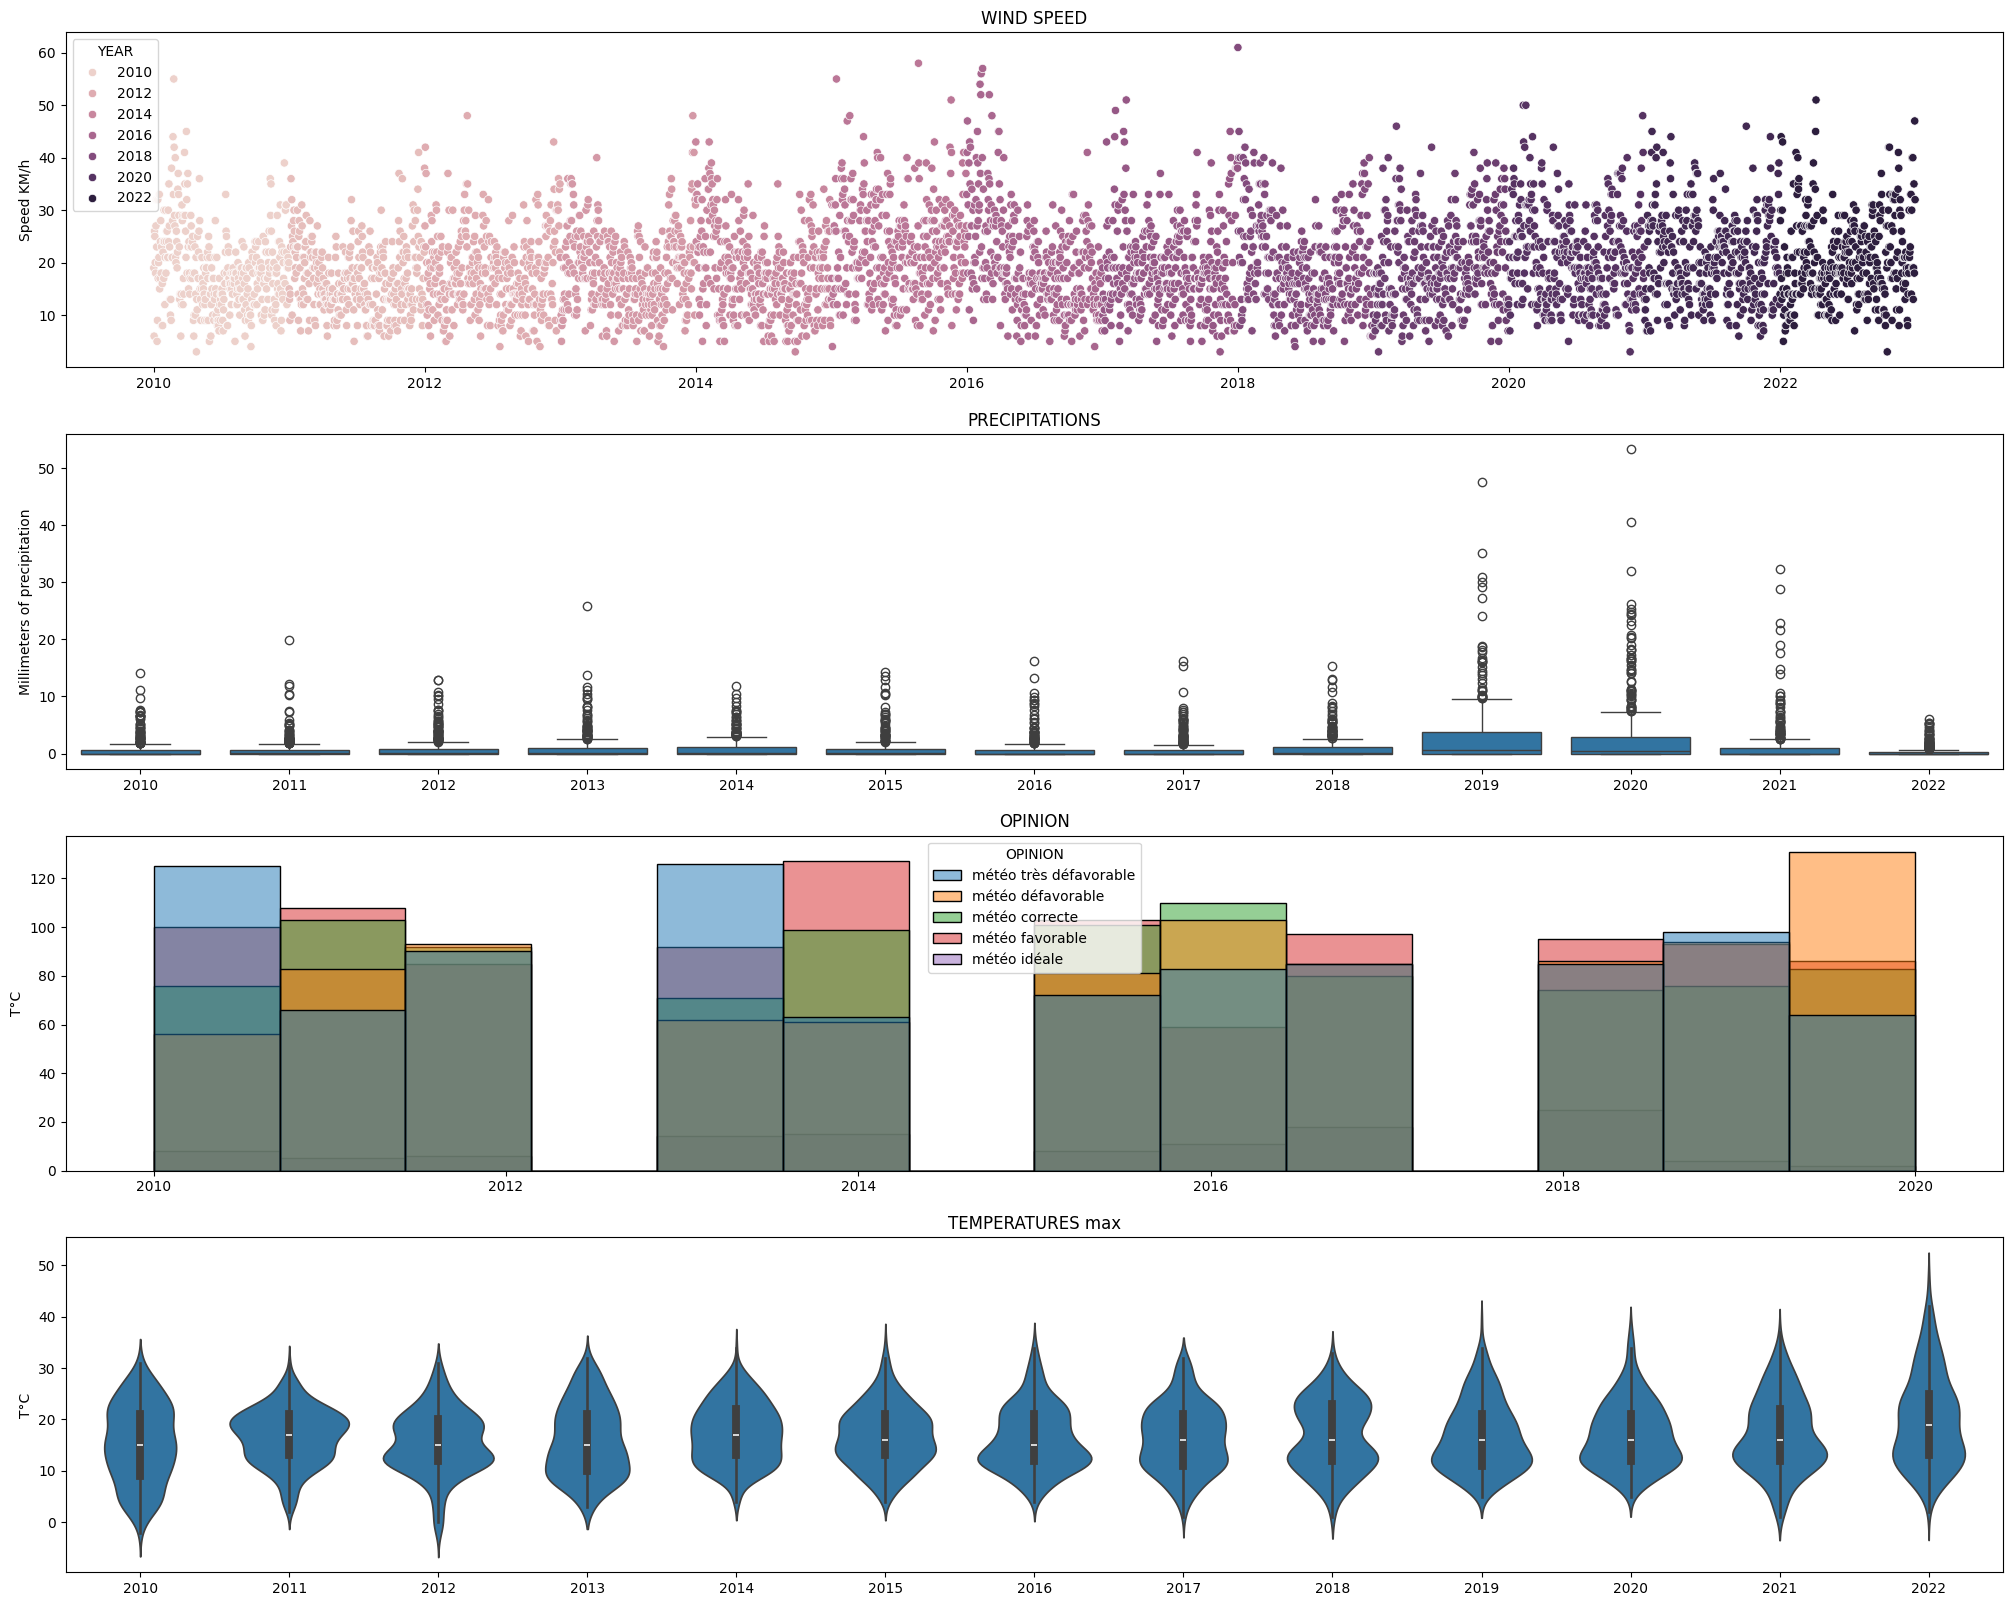

In [ ]:
#Pour cette partie on va utiliser sns avec une boucle
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

#On va créer une boucle pour afficher plusieurs graph en sns

#création d'un dico de valeur pour la boucle
dict_viz = {
            411 : [sns.scatterplot, 'DATE', 'WINDSPEED_MAX_KMH', 'YEAR', 'WIND SPEED', '', 'Speed KM/h',''],
            412 : [sns.boxplot, 'YEAR', 'PRECIP_TOTAL_DAY_MM', '', 'PRECIPITATIONS', '', 'Millimeters of precipitation',''],
            413 : [sns.histplot, 'YEAR', '', 'OPINION', 'OPINION', '', 'T°C','fill'],
            414 : [sns.violinplot, 'YEAR', 'MAX_TEMPERATURE_C', '', 'TEMPERATURES max', '', 'T°C','']
        }
fig, axes = plt.subplots(4,1,figsize=(25, 20))

for position, infos in dict_viz.items():

    # FIGURE
    plt.subplot(position)
    # VIZ
    infos[0](
            data = df_final,
            x = infos[1],
            y = infos[2] if infos[2] != '' else None,
            hue = infos[3] if infos[3] != '' else None
    )
    # LEGENDE
    plt.title(infos[4])
    plt.xlabel(infos[5])
    plt.ylabel(infos[6])
    plt.axes


Graph 1 : Le vent est en augmentation depuis 2015
Graph 2 : Grosse période de pluie en 2019/2020, le reste est convenable avec une année 2014 avec un maximum de pluie inférieur à 10mm
Graph 3 : L'année 2014 fortement meilleur que les autres avec près de 40% des valeurs de la colonne opinion entre météo correct et favorable
Graph 4 : Une température excellente en 2014 avec une répartition homogène sur l'année. 
La meilleur année me semble être 2014 au niveau du temps. 